In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import median_absolute_error

In [2]:
# Read the training and test datasets
train = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")
submission_sample = pd.read_csv("/kaggle/input/playground-series-s3e25/sample_submission.csv")

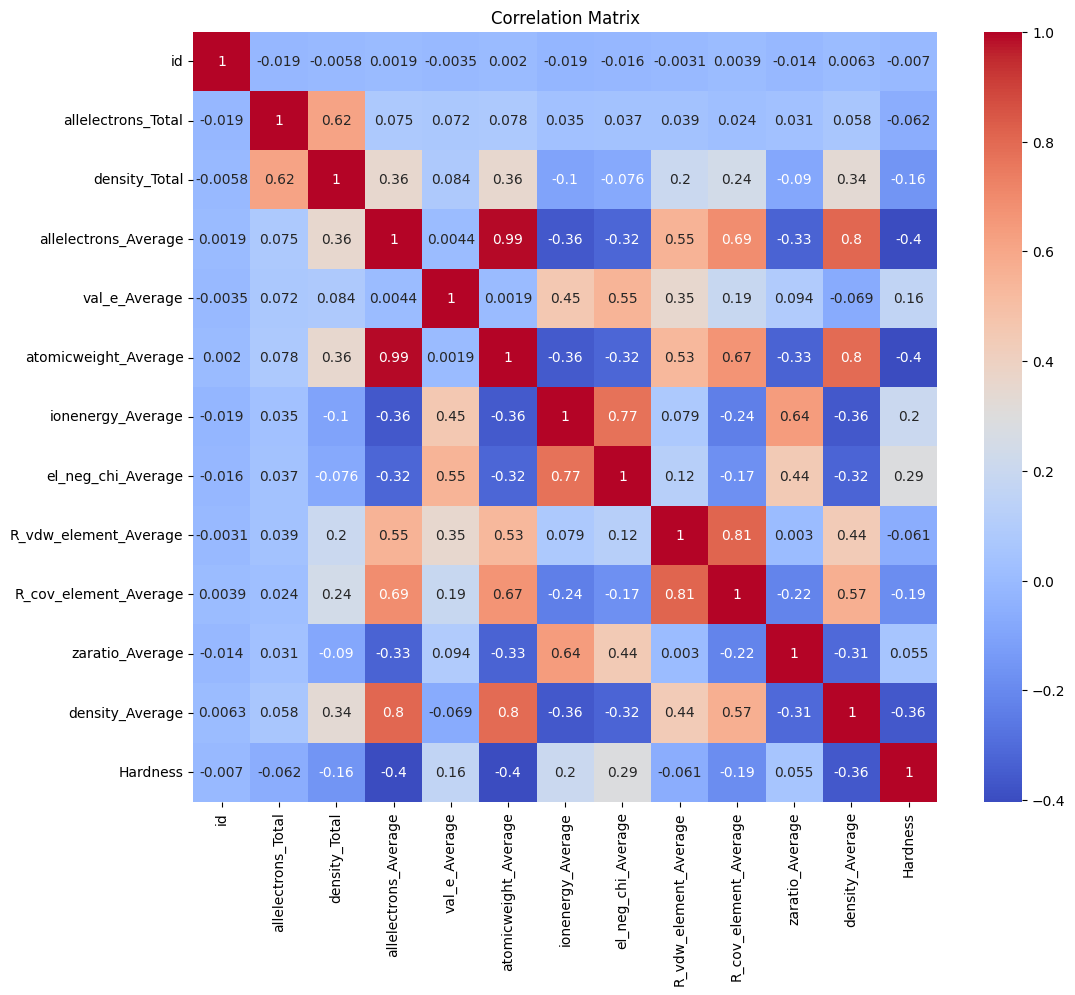

In [3]:
# Exploratory Data Analysis (EDA)
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [4]:
# Feature Engineering
scaler = StandardScaler()
numerical_features = ['allelectrons_Total', 'density_Total', 'allelectrons_Average', 'val_e_Average', 'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average', 'density_Average']
train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])

In [5]:
# Split the dataset into training and validation sets
X = train.drop(columns=['Hardness', 'id'])
y = train['Hardness']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature Engineering
scaler = StandardScaler()
numerical_features = ['allelectrons_Total', 'density_Total', 'allelectrons_Average', 'val_e_Average', 'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average', 'density_Average']
train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])


In [7]:
# Model Training
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_val)
lr_medAE = median_absolute_error(y_val, lr_predictions)
print(f"Linear Regression - Median Absolute Error on Validation Set: {lr_medAE}")

Linear Regression - Median Absolute Error on Validation Set: 0.9746931623972586


In [8]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)
rf_medAE = median_absolute_error(y_val, rf_predictions)
print(f"Random Forest - Median Absolute Error on Validation Set: {rf_medAE}")


Random Forest - Median Absolute Error on Validation Set: 0.6719999999999973


In [9]:
# Gradient Boosting with Hyperparameter Tuning
gb_model = GradientBoostingRegressor()
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, scoring='neg_median_absolute_error', cv=5)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
gb_predictions = best_gb_model.predict(X_val)
gb_medAE = median_absolute_error(y_val, gb_predictions)
print(f"Gradient Boosting - Median Absolute Error on Validation Set: {gb_medAE}")


Gradient Boosting - Median Absolute Error on Validation Set: 0.6463052779906286


In [10]:
# Support Vector Regressor with Hyperparameter Tuning
svr_model = SVR()
svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, scoring='neg_median_absolute_error', cv=5)
svr_grid_search.fit(X_train, y_train)
best_svr_model = svr_grid_search.best_estimator_
svr_predictions = best_svr_model.predict(X_val)
svr_medAE = median_absolute_error(y_val, svr_predictions)
print(f"Support Vector Regressor - Median Absolute Error on Validation Set: {svr_medAE}")

Support Vector Regressor - Median Absolute Error on Validation Set: 0.6055000794100589


In [11]:
# Import additional libraries
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor


In [12]:
# AdaBoost
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_val)
adaboost_medAE = median_absolute_error(y_val, adaboost_predictions)
print(f"AdaBoost - Median Absolute Error on Validation Set: {adaboost_medAE}")

AdaBoost - Median Absolute Error on Validation Set: 0.9414264101393057


In [13]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)
xgb_medAE = median_absolute_error(y_val, xgb_predictions)
print(f"XGBoost - Median Absolute Error on Validation Set: {xgb_medAE}")


XGBoost - Median Absolute Error on Validation Set: 0.6954789161682129


In [14]:
# LightGBM
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_val)
lgbm_medAE = median_absolute_error(y_val, lgbm_predictions)
print(f"LightGBM - Median Absolute Error on Validation Set: {lgbm_medAE}")


LightGBM - Median Absolute Error on Validation Set: 0.6543755473003552


In [15]:
# MLP (Neural Network)
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_val)
mlp_medAE = median_absolute_error(y_val, mlp_predictions)
print(f"MLP (Neural Network) - Median Absolute Error on Validation Set: {mlp_medAE}")


MLP (Neural Network) - Median Absolute Error on Validation Set: 0.7723145661264978


In [16]:
# Choose the best model
best_model = min([
    (lr_medAE, 'Linear Regression'), 
    (rf_medAE, 'Random Forest'), 
    (gb_medAE, 'Gradient Boosting'), 
    (svr_medAE, 'Support Vector Regressor'), 
    (adaboost_medAE, 'AdaBoost'),
    (xgb_medAE, 'XGBoost'),
    (lgbm_medAE, 'LightGBM'),
    (mlp_medAE, 'MLP')
], key=lambda x: x[0])[1]


In [17]:
# Make predictions on the test set for submission using the best model
if best_model == 'Linear Regression':
    test_predictions = lr_model.predict(test.drop(columns=['id']))
elif best_model == 'Random Forest':
    test_predictions = rf_model.predict(test.drop(columns=['id']))
elif best_model == 'Gradient Boosting':
    test_predictions = best_gb_model.predict(test.drop(columns=['id']))
elif best_model == 'Support Vector Regressor':
    test_predictions = best_svr_model.predict(test.drop(columns=['id']))

In [18]:
# Create the submission file
submission = pd.DataFrame({'id': test['id'], 'Hardness': test_predictions})
submission.to_csv(f"submission_{best_model.replace(' ', '_').lower()}.csv", index=False)